In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import librosa
import librosa.display

In [5]:
ipd.Audio('Capstone/download.wav')

In [48]:
ipd.Audio('Capstone/output.wav')

In [13]:
drum_signal, sr = librosa.load('Capstone/download.wav')

Above returns numpy array and sampling rate

In [9]:
print(f'The sampling rate is {sr} Hz')

The sampling rate is 22050 Hz


In [11]:
print(f'The number of samples we have are {drum_signal.shape[0]}')

The number of samples we have are 66150


In [14]:
drum_ft = np.fft.fft(drum_signal)

In [17]:
print('The dft has {drum_ft.shape[0]} bins. DFT has as many bins as number of samples. DFT are complex numbers, so only want magnitudes')

The dft has {drum_ft.shape[0]} bins. DFT has as many bins as number of samples. DFT are complex numbers, so only want magnitudes


In [18]:
drum_ft[0]

(-442.8912353515625+0j)

In [20]:
drum_magnitude_spectrum = np.abs(drum_ft)
drum_magnitude_spectrum[0]

442.8912353515625

In [45]:
def plot_magnitude_spectrum(signal:np.array, title:str, sr:int, f_ratio=1):
    ft = np.fft.fft(signal)
    mag = np.abs(ft)

    #plot
    plt.figure(figsize=(18,5))

    #create frequency bins along x-axis
    frequency = np.linspace(0,sr,len(mag))
    frequency_bins_keep = int(len(frequency) * f_ratio)
    print('The max frequency kept is:',frequency[frequency_bins_keep - 1],'Hz')
    plt.plot(frequency[:frequency_bins_keep], mag[:frequency_bins_keep])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)
    plt.show()

The max frequency kept is: 2204.699995464784 Hz


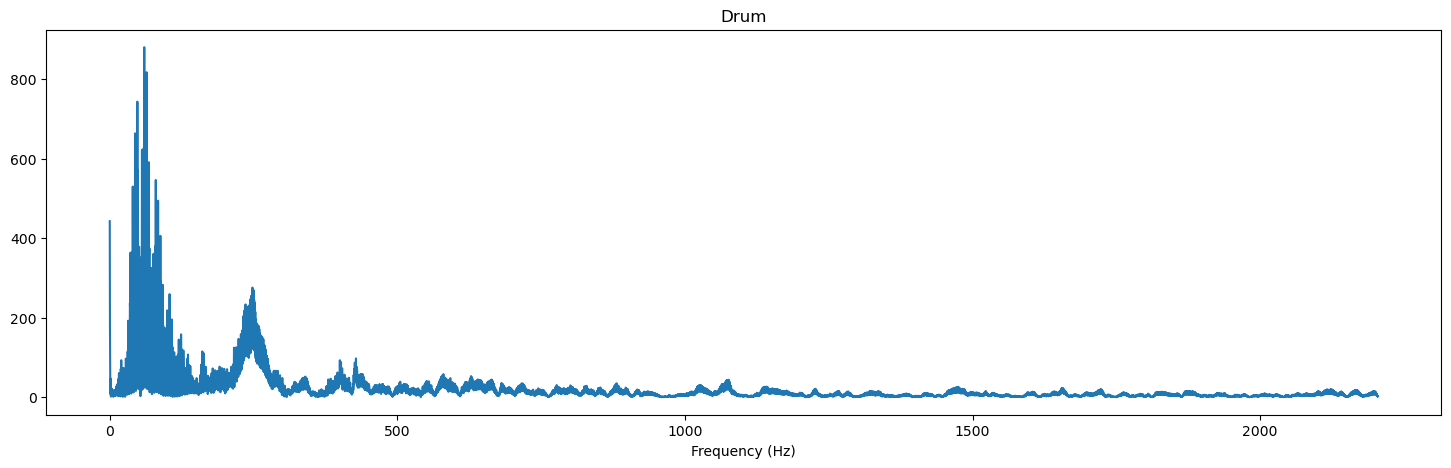

In [47]:
#if f_ratio = 0.5 then considering frequencies up to Nyquist frequencies
plot_magnitude_spectrum(drum_signal, 'Drum',sr, 0.1)

STFT

In [57]:
wav_path = '1-13571-A-46.wav'
kaggle_audio, sr = librosa.load(wav_path)
ipd.Audio(wav_path)

In [58]:
FRAME_SIZE = 2048
HOP_SIZE = 512
kaggle_audio.shape

(110250,)

In [63]:
sr

22050

In [59]:
S_kaggle = librosa.stft(kaggle_audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [60]:
S_kaggle.shape

(1025, 216)

The first index corresponds to half the (frame size + 1). The second dimension (columns) is the number of frames/ number of bins

In [61]:
Y_kaggle = np.abs(S_kaggle)**2 #to get the power spectrum

In [64]:
def plot_spectrogram(Y, sr, hop_length, y_axis='linear'):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(
        Y,
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis=y_axis
    )
    plt.colorbar(format='%+2.f')

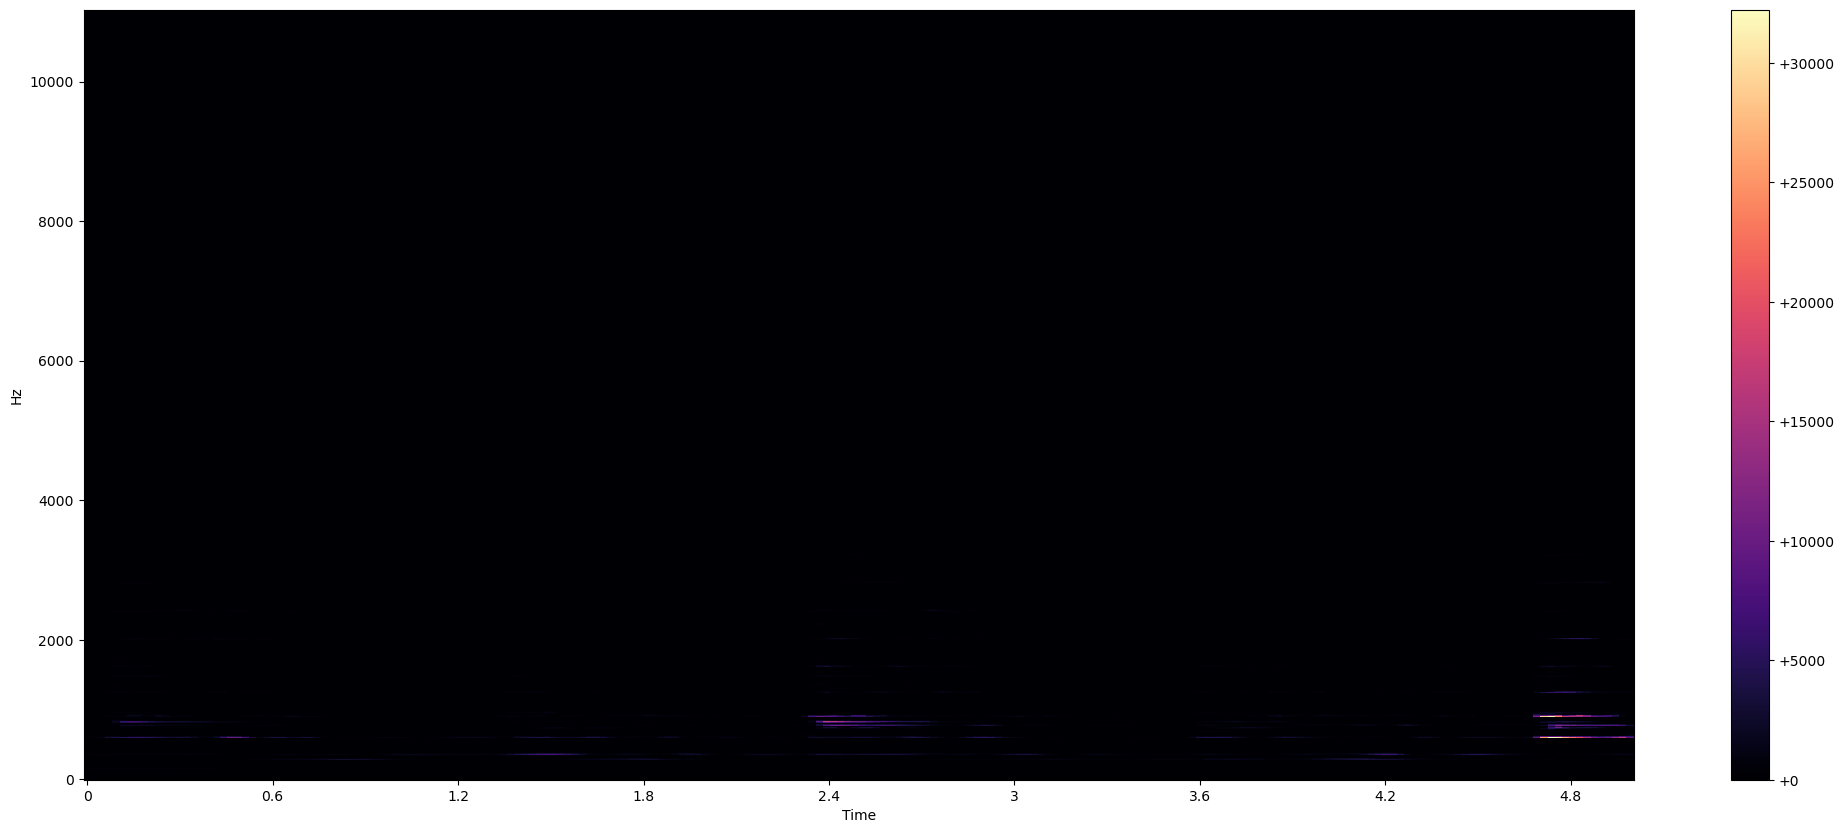

In [65]:
plot_spectrogram(Y_kaggle,sr,HOP_SIZE)

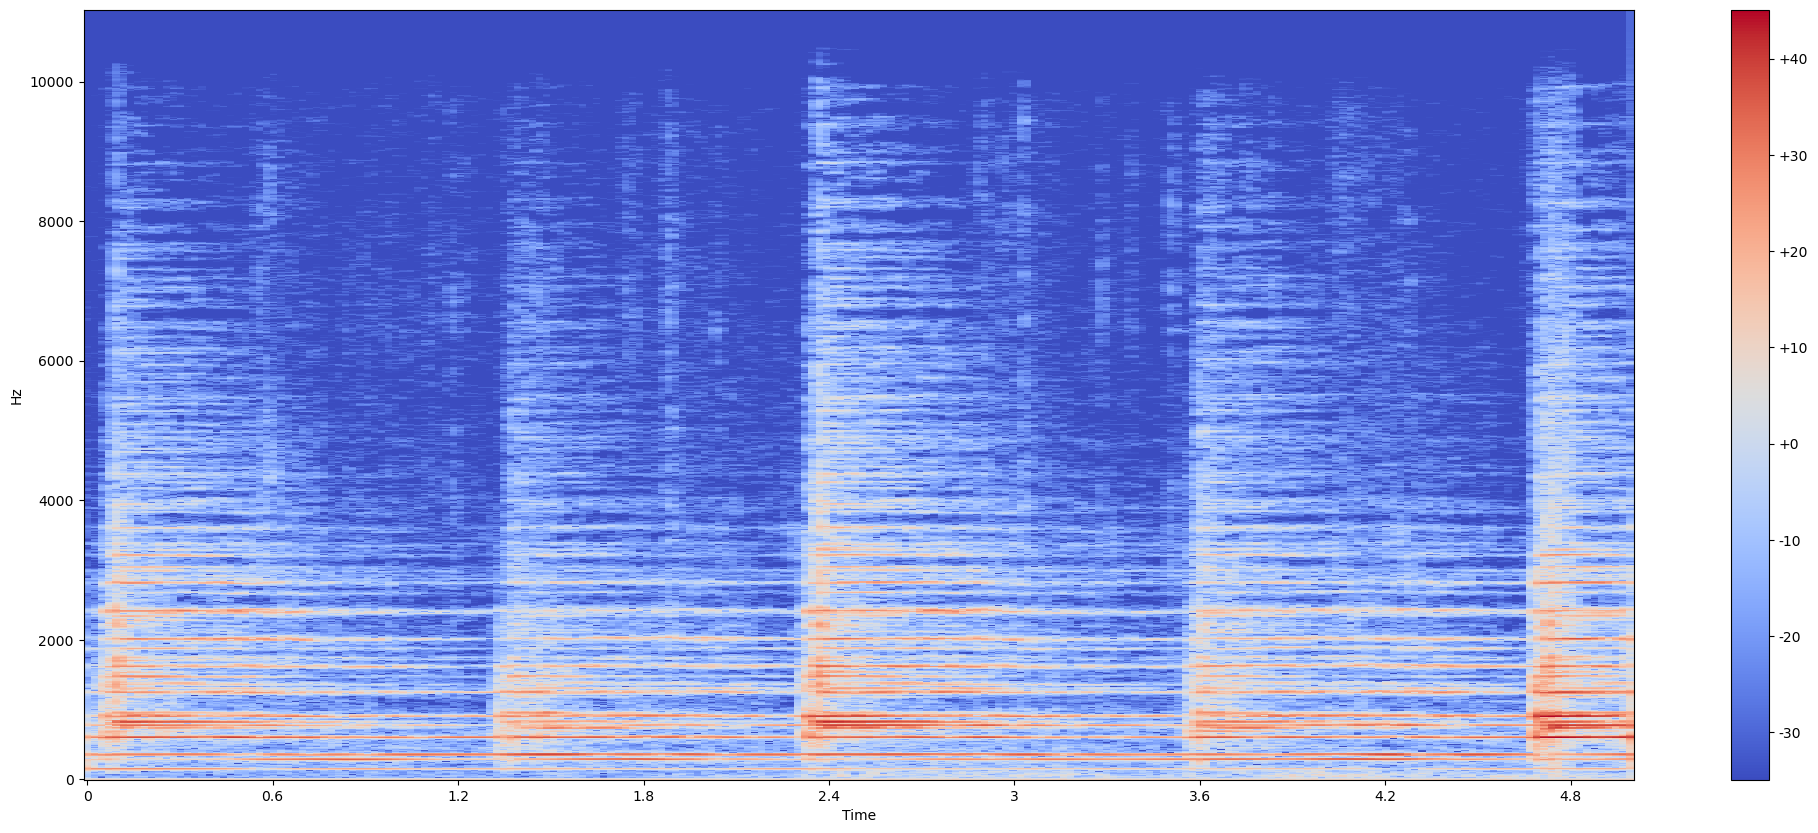

In [66]:
Y_log_scale = librosa.power_to_db(Y_kaggle) #need to do
plot_spectrogram(Y_log_scale,sr,HOP_SIZE)

**Better to use log representation of frequency**

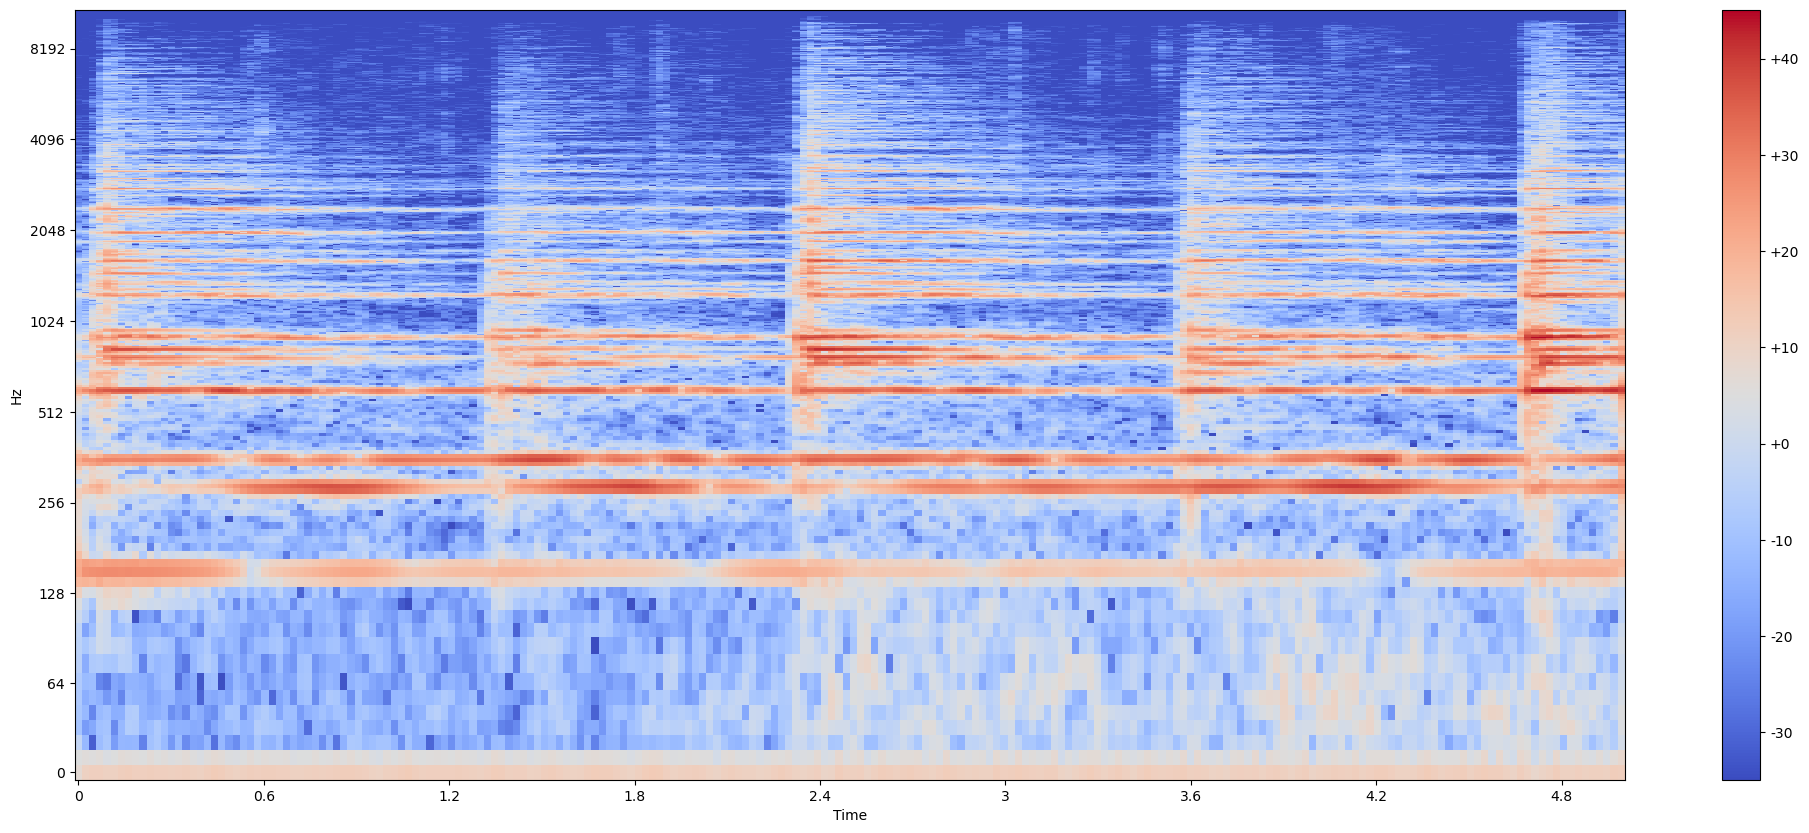

In [67]:
plot_spectrogram(Y_log_scale,sr,HOP_SIZE,y_axis='log')

***MFCCs***

Use number of mfcc as 13 as standard

In [74]:
mfccs = librosa.feature.mfcc(kaggle_audio,n_mfcc=13, sr=sr)

In [75]:
#13 coefficients, 216 frames --> comes from frame size of FRAME_SIZE = 2048, HOP_SIZE = 512
mfccs.shape

(13, 216)

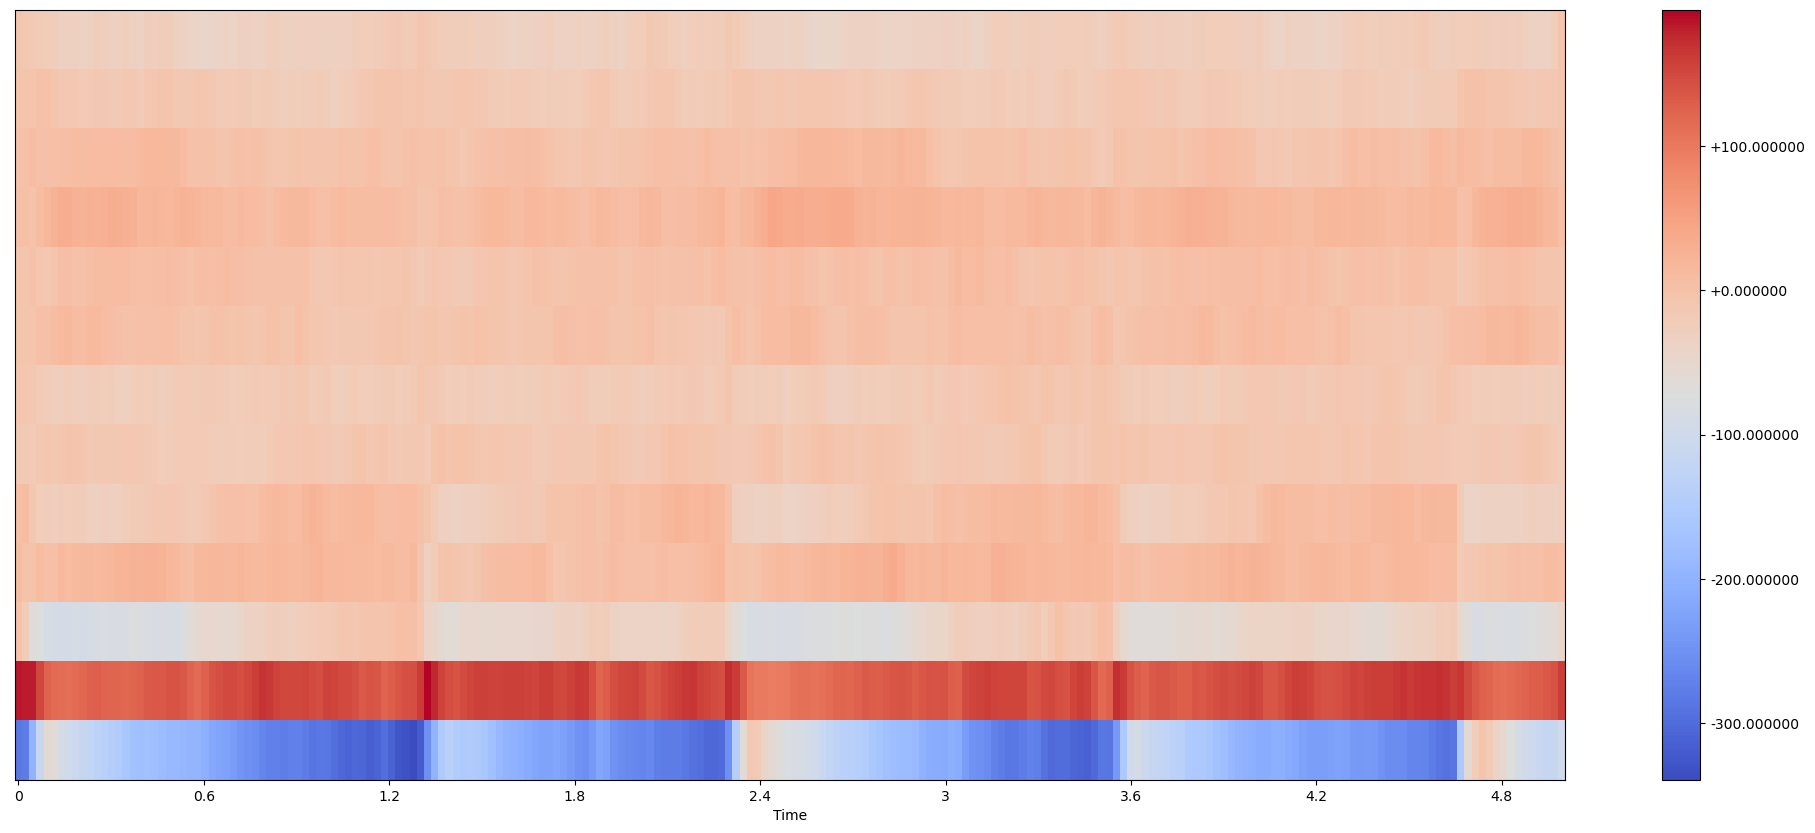

In [76]:
plt.figure(figsize=(25,10))
librosa.display.specshow(
    mfccs,
    x_axis='time',
    y_axis=
    sr=sr
)
plt.colorbar(format='%+2f')